In [1]:
import pandas as pd
import numpy as np

In [2]:
glass=pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
import seaborn as sns

<AxesSubplot:>

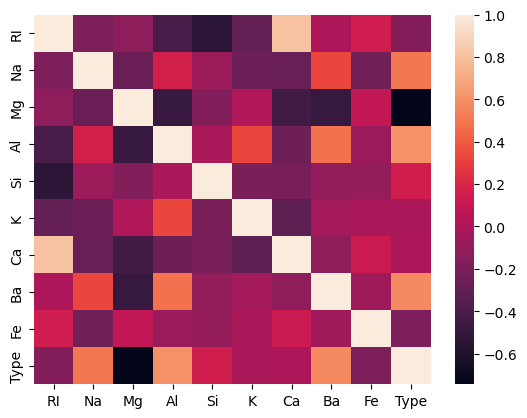

In [8]:
sns.heatmap(glass.corr())

In [9]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [10]:
#deviding dataset into predictor and target 
array = glass.values
X = array[:, 0:-1]
Y = array[:, -1]

using min max scalling on dataset

In [13]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [15]:
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

splitting data set into training dataset and testing data set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=1)

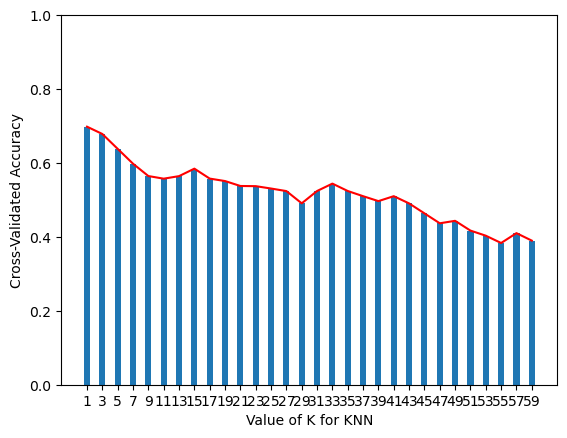

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = [2*i+1 for i in range(0,30)]
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=5)
    k_scores.append(scores.mean())

plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0,1)
plt.show()

In [19]:
np.argmax(k_scores)

0

In [20]:
k_range[0]

1

In [21]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
preds=model.predict(x_test)
preds_train = model.predict(x_train)

In [23]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(preds_train,y_train)

1.0

In [25]:
preds_train = model.predict(x_train)
pd.Series(preds_train).value_counts()

2.0    55
1.0    45
7.0    20
5.0    11
3.0    10
6.0     8
dtype: int64

In [26]:
metrics.accuracy_score(preds,y_test)

0.7692307692307693

In [27]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1.0    24
2.0    22
7.0     9
3.0     5
5.0     3
6.0     2
dtype: int64

In [28]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(x_train,y_train)
preds=model2.predict(x_test)
preds_train = model2.predict(x_train)

In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

In [29]:
metrics.accuracy_score(preds_train,y_train)

0.7919463087248322

In [30]:
metrics.accuracy_score(preds,y_test)

0.7384615384615385

In [31]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)
preds=model3.predict(x_test)
preds_train = model3.predict(x_train)

In [32]:
metrics.accuracy_score(preds_train,y_train)

0.7718120805369127

In [33]:
metrics.accuracy_score(preds,y_test)

0.7076923076923077

In [34]:
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(x_train,y_train)
preds=model4.predict(x_test)
preds_train = model4.predict(x_train)

In [35]:
metrics.accuracy_score(preds_train,y_train)

0.6912751677852349

In [36]:
metrics.accuracy_score(preds,y_test)

0.7230769230769231

In [37]:
model5 = KNeighborsClassifier(n_neighbors=15)
model5.fit(x_train,y_train)
preds=model5.predict(x_test)
preds_train = model5.predict(x_train)

In [38]:
metrics.accuracy_score(preds_train,y_train)

0.6174496644295302

In [39]:
metrics.accuracy_score(preds,y_test)

0.7538461538461538